<br>
<h1 style = "font-size:60px; font-family:Monaco ; font-weight : normal; background-color: #000055 ; color : #9999ff; text-align: center; border-radius: 50px 50px;">SETI - Breakthrough Listen<br>Exploratory Data Analysis</h1>
<br>

## Description of problem
The vast distances between stars/galaxies and the dramatic effects of the inverse square law make finding electromagnetic signals of intelligent civilizations a challenging task.  Breakthroughs in machine learning using computer vision and time series analysis are tools that may bring us closer to achieving this goal.  The purpose of this notebook, and the greater experiment that this notebook belongs to is to attempt to push the state of the art ever closer to realizing this goal.

## Seti Breakthrough-Listen Dataset
The purpose of this notebook is to interrogate the dataset and try to better understand SETI's data.  The data consists of "cadence snippets taken from the Green Bank Telescope", which is a digital spectrometer that generates spectrograms using the Fourier Transform technique.  The data represent signal intensity as a function of frequency and time.  

The "Cadence" is described in the "Data Information" section of the competition:  
5 minutes on star “A”, then 5 minutes on star “B”, then back to star “A” for 5 minutes, then “C”, then back to “A”, then finishing with 5 minutes on star “D”. One set of six observations (ABACAD) is referred to as a “cadence”.  

The shape of the data is (6, 273, 256), where 273 represents the time (5 minutes) dimension, and 256 represents the frequency dimension.  


## Overview of this notebook:
- 

In [2]:
import os
from glob import glob

# Data interrogation/manipulation
import sklearn
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Let's take a look a look at directory structure
(kaggle3811) dan@mcslappy:seti$ ls  
> old_leaky_data  sample_submission.csv  test  train  train_labels.csv  

(kaggle3811) dan@mcslappy:seti$ ls train  
> 0  1  2  3  4  5  6  7  8  9  a  b  c  d  e  f  

(kaggle3811) dan@mcslappy:seti$ ls train/0/|head
> 0000799a2b2c42d.npy  
> 00042890562ff68.npy  
> 0005364cdcb8e5b.npy  

(kaggle3811) dan@mcslappy:seti$ cat train_labels.csv |head  
> id,target  
> 0000799a2b2c42d,0  
> 00042890562ff68,0  
> 0005364cdcb8e5b,0  

#### The first character of each npy file corresponds to the hash listed in *_labels.csv

### Let's take a look at an example of a positive and a negative sample

In [3]:
datadir = "/data/data/datasets/seti/"
train_labels = pd.read_csv(os.path.join(datadir, "train_labels.csv"))

In [18]:
negative_id = train_labels.loc[train_labels["target"]==0].head(1).id.item()
negative_id

'0000799a2b2c42d'

In [19]:
positive_id = train_labels.loc[train_labels["target"]==1].head(1).id.item()
positive_id

'0024012d1431fbc'

In [21]:
positive_sample = np.load(os.path.join(datadir, "train", positive_id[0], f"{positive_id}.npy"))
negative_sample = np.load(os.path.join(datadir, "train", negative_id[0], f"{negative_id}.npy"))

In [22]:
positive_sample.shape

(6, 273, 256)

In [26]:
def display_cadence(cadence: np.array, target:int, cadence_id: str) -> None:
    for i in range(6):
        plt.figure(figsize=(12, 6))
        plt.subplot(6, 1, i + 1)
        if i == 0:
            plt.title(f"ID: {cadence_id} TARGET: {target}", fontsize=16)
        plt.imshow(cadence[i].astype(float), interpolation='nearest', aspect='auto')
        plt.text(5, 100, ["ON", "OFF"][i % 2], bbox={'facecolor': 'white'})
        plt.xticks([])
    plt.show()

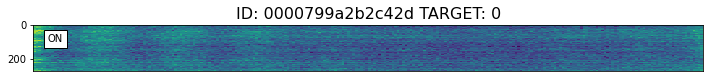

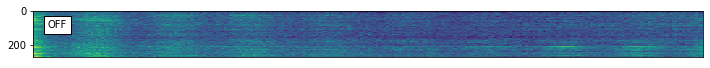

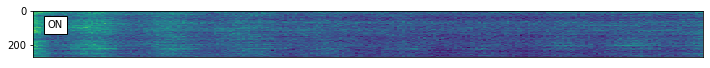

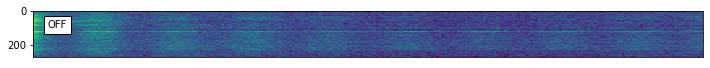

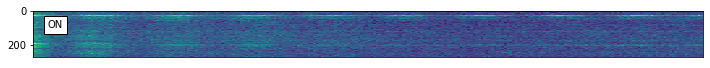

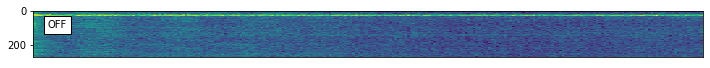

In [27]:
display_cadence(negative_sample, 0, negative_id)

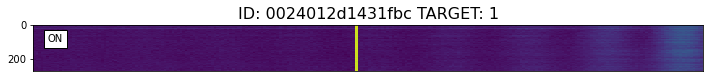

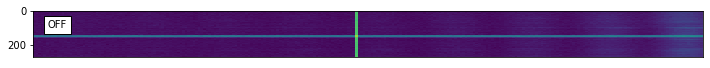

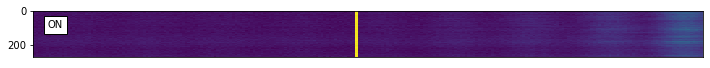

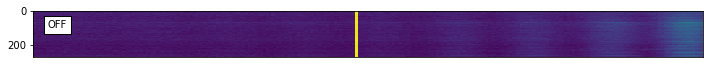

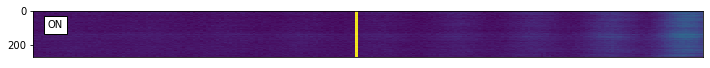

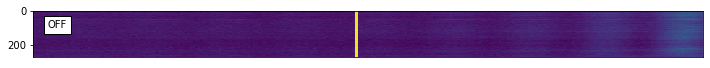

In [28]:
display_cadence(positive_sample, 1, positive_id)

## It seems very difficult to pick out the "needle"
<font color='red'>Let's look at a few more positive samples</font>

In [37]:
positive_ids = [item[1] for item in train_labels.loc[train_labels["target"]==1].tail(3).id.items()]
positive_ids

['ffdbb03ff1c2e7e', 'ffe5c15a872577d', 'fffbb1c9c3d6c31']

In [38]:
positive_samples = [np.load(os.path.join(datadir, "train", positive_id[1], f"{positive_id}.npy")) for positive_id in positive_ids]

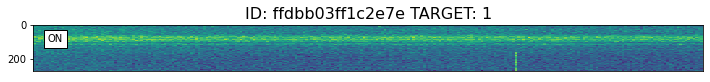

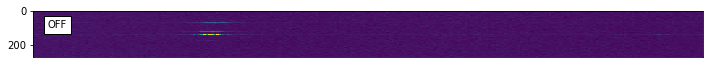

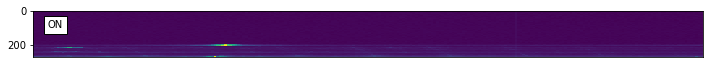

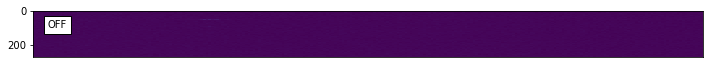

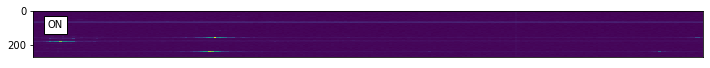

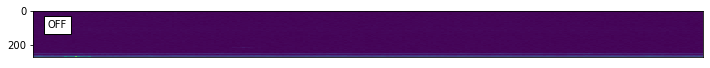

In [39]:
display_cadence(positive_samples[0], 1, positive_ids[0])

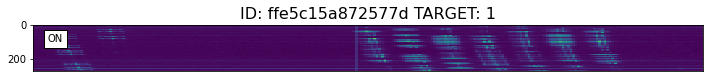

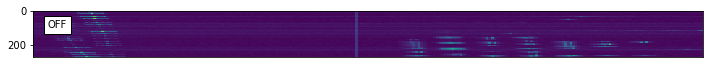

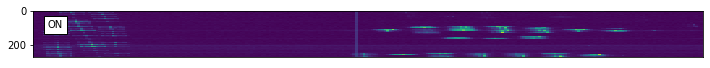

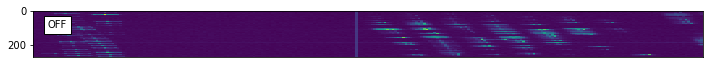

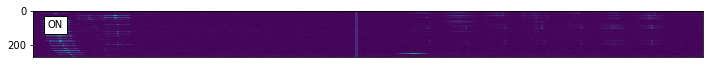

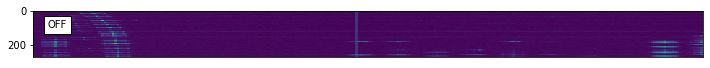

In [40]:
display_cadence(positive_samples[1], 1, positive_ids[1])

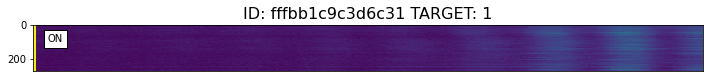

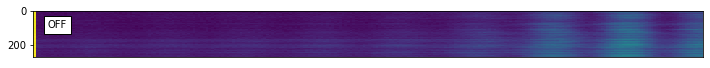

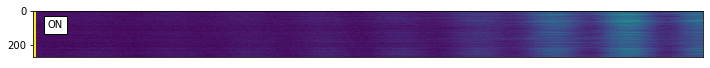

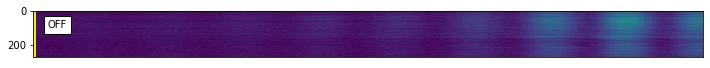

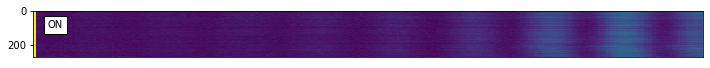

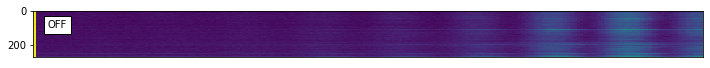

In [41]:
display_cadence(positive_samples[2], 1, positive_ids[2])